<a href="https://colab.research.google.com/github/kckohkoh2/fantastic-disco/blob/master/day0125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

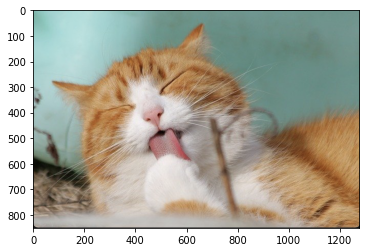

In [9]:
import cv2
import matplotlib.pyplot as plt
img_cv=cv2.imread('cat.png')
img_rgb=cv2.cvtColor(img_cv,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

(851, 1277)


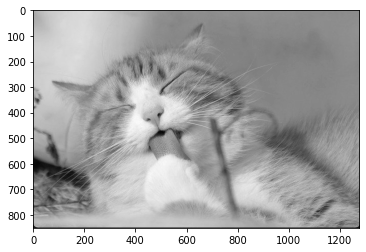

In [11]:
img_gray=cv2.cvtColor(img_cv,cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
plt.imshow(img_gray,'gray')

In [18]:
def convolution(m,f,s=1):
    import numpy as np
    mx,my=np.shape(m)
    fx,fy=np.shape(f)
    p=0;s=1
    ow=int((mx+2*p-fx)/s)+1
    oh=int((my+2*p-fy)/s)+1
    result=[]
    for i in range(0,mx+2*p-fx+1,s): 
        for j in range(0,my+2*p-fy+1,s): 
            result.append((m[i:i+fy,j:j+fy]*f).sum())
    result=np.array(result).reshape(ow,oh)
    np.where(result>255,255,result)
    return result

In [23]:
f_vertical=np.array([[1,0,-1],
                     [2,0,-2],
                     [1,0,-1]])
f_horizontal=np.array([[1,2,1],
                       [0,0,0],
                       [-1,-2,-1]])
img_conv_v=convolution(img_gray,f_vertical)
img_conv_h=convolution(img_gray,f_horizontal)

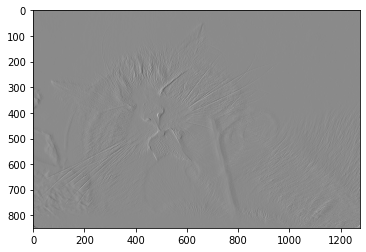

In [24]:
plt.imshow(img_conv_v,'gray')

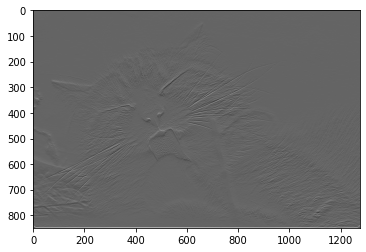

In [25]:
plt.imshow(img_conv_h,'gray')

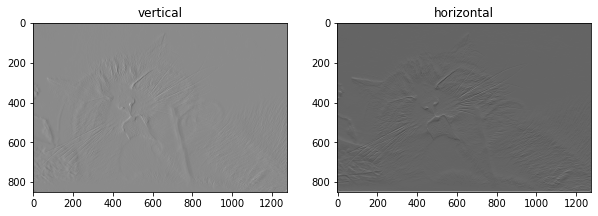

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("vertical")
plt.imshow(img_conv_v,'gray')
plt.subplot(1,2,2)
plt.title("horizontal")
plt.imshow(img_conv_h,'gray')
plt.show()

In [5]:
img_b=img_cv[:,:,0]
img_g=img_cv[:,:,1]
img_r=img_cv[:,:,2]
#입력데이터
import numpy as np
m_r=img_r
m_g=img_g
m_b=img_b
#합성곱 필터
f1=np.array([[1,0,-1],
            [1,0,-1],
            [1,0,-1]])
f2=np.array([[1,1,1],
            [0,0,0],
            [-1,-1,-1]])
f3=np.array([[1,2,1],
             [2,0,2],
             [1,2,1]])
img_conv_r=convolution(m_r,f2)
img_conv_g=convolution(m_g,f2)
img_conv_b=convolution(m_b,f2)
img_conv=img_conv_r+img_conv_g+img_conv_b

NameError: ignored

In [13]:
print(img_conv.shape)

(849, 1275)


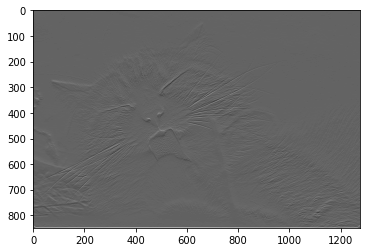

In [24]:
plt.imshow(img_conv,'gray')

In [16]:
def pooling_max(m,f,s):
    import numpy as np
    mx,my=np.shape(m)
    ow=int((mx-f)/s)+1
    oh=int((my-f)/s)+1
    result=[]
    for i in range(0,mx-f+1,s): 
        for j in range(0,my-f+1,s): 
            result.append(m[i:i+f,j:j+f].max())
    result=np.array(result).reshape(ow,oh)
    return result

In [18]:
m=[[1,2,3,4],
   [3,4,5,6],
   [5,6,7,8],
   [7,8,9,10]]
m=np.array(m)
r=pooling_max(m,2,2)
print(r)

[[ 4  6]
 [ 8 10]]


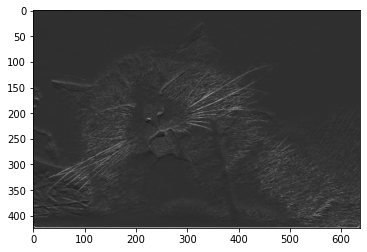

In [25]:
img_pool=pooling_max(img_conv,2,2)
plt.imshow(img_pool,'gray')